# EXPLORATION AIRDATA

## Importation des données

In [1]:
import pandas as pd
df = pd.read_csv("airdata_dataset/2016_01.csv",sep=",")

#POUR IMPORTER TOUTES LES DONNÉES, IL FAUT UTILISER LE CODE SUIVANT

#for i in range(2,10):
#    print(i)
#    df = df.append(pd.read_csv("airdata_dataset/2016_0"+str(i)+".csv",sep=",",error_bad_lines=False))

#for i in range(10,13):
#    print(i)
#    df = df.append(pd.read_csv("airdata_dataset/2016_"+str(i)+".csv",sep=",",error_bad_lines=False))

In [2]:
pd.set_option('display.max_columns', 500)
df.describe(include="all")

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count   445827.0  445827.0  445827.0  445827.000000  445827.000000   
unique       NaN       NaN       NaN            NaN            NaN   
top          NaN       NaN       NaN            NaN            NaN   
freq         NaN       NaN       NaN            NaN            NaN   
mean      2016.0       1.0       1.0      15.893510       4.113815   
std          0.0       0.0       0.0       8.936692       2.005007   
min       2016.0       1.0       1.0       1.000000       1.000000   
25%       2016.0       1.0       1.0       8.000000       2.000000   
50%       2016.0       1.0       1.0      16.000000       4.000000   
75%       2016.0       1.0       1.0      24.000000       6.000000   
max       2016.0       1.0       1.0      31.000000       7.000000   

           FL_DATE UNIQUE_CARRIER     AIRLINE_ID CARRIER TAIL_NUM  \
count       445827         445827  445827.000000  445827   441583   
unique          31             12            NaN      12     4238   
top     2016-01-03             WN            NaN      WN   N489HA   
freq         15878         104154            NaN  104154      358   
mean           NaN            NaN   19903.085069     NaN      NaN   
std            NaN            NaN     382.853084     NaN      NaN   
min            NaN            NaN   19393.000000     NaN      NaN   
25%            NaN            NaN   19790.000000     NaN      NaN   
50%            NaN            NaN   19805.000000     NaN      NaN   
75%            NaN            NaN   20304.000000     NaN      NaN   
max            NaN            NaN   21171.000000     NaN      NaN   

               FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count   445827.000000      445827.000000           4.458270e+05   
unique            NaN                NaN                    NaN   
top               NaN                NaN                    NaN   
freq              NaN                NaN                    NaN   
mean      2078.856456       12682.120789           1.268215e+06   
std       1757.269780        1529.485604           1.529483e+05   
min          1.000000       10135.000000           1.013503e+06   
25%        702.000000       11292.000000           1.129202e+06   
50%       1594.000000       12889.000000           1.288903e+06   
75%       2763.000000       14027.000000           1.402702e+06   
max       7438.000000       16218.000000           1.621801e+06   

        ORIGIN_CITY_MARKET_ID  ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
count           445827.000000  445827           445827           445827   
unique                    NaN     294              290               52   
top                       NaN     ATL      Atlanta, GA               CA   
freq                      NaN   29870            29870            56245   
mean             31723.938281     NaN              NaN              NaN   
std               1280.460591     NaN              NaN              NaN   
min              30070.000000     NaN              NaN              NaN   
25%              30615.000000     NaN              NaN              NaN   
50%              31453.000000     NaN              NaN              NaN   
75%              32467.000000     NaN              NaN              NaN   
max              35991.000000     NaN              NaN              NaN   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM    ORIGIN_WAC  DEST_AIRPORT_ID  \
count       445827.000000          445827  445827.00000    445827.000000   
unique                NaN              52           NaN              NaN   
top                   NaN      California           NaN              NaN   
freq                  NaN           56245           NaN              NaN   
mean            25.724613             NaN      55.65243     12681.700924   
std             16.752301             NaN      26.95134      1529.329960   
min              1.000000             NaN       1.00000     10135.000000   
25%             12.000000   

On supprime la dernière colonne due à une virgule de trop dans le fichier csv.

In [3]:
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

In [4]:
print("Nombre de vols répertoriés pour le mois étudié : " + str(len(df)))

Nombre de vols répertoriés pour le mois étudié : 445827


# Recherche et traitement des duplicates

In [5]:
df[df.duplicated(subset=["DAY_OF_MONTH","DAY_OF_WEEK","UNIQUE_CARRIER","FL_NUM","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID"], keep=False)].sort_values(by=["UNIQUE_CARRIER","FL_NUM","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","DAY_OF_MONTH","DAY_OF_WEEK"])

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, UNIQUE_CARRIER, AIRLINE_ID, CARRIER, TAIL_NUM, FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_FIPS, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, DEP_DELAY_GROUP, DEP_TIME_BLK, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DELAY_NEW, ARR_DEL15, ARR_DELAY_GROUP, ARR_TIME_BLK, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, FLIGHTS, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, FIRST_DEP_TIME, TOTAL_ADD_GTIME, LONGEST_ADD_GTIME]
Index: []

Ainsi, la recherche des doublons montre qu'il n'existe pas de doublons dans cette base. Toutefois, il faut noter qu'on peut avoir 2 fois le même code de vol pour 2 trajets différents sur une même compagnie, et ceci le même jour. C'est fréquent dans l'aviation paraît-il.

# Recherche et traitement des outliers

In [6]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [7]:
import matplotlib.pyplot as plt

col_to_plot=['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
             #'TAIL_NUM',
             'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID',
             'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
             'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
             'DEP_DELAY',
             #'DEP_TIME_BLK',
             'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON','TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',
             #'ARR_TIME_BLK',
             'CANCELLED',
             #'CANCELLATION_CODE',
             'DIVERTED', 'CRS_ELAPSED_TIME',
             'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
             'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
             'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME']

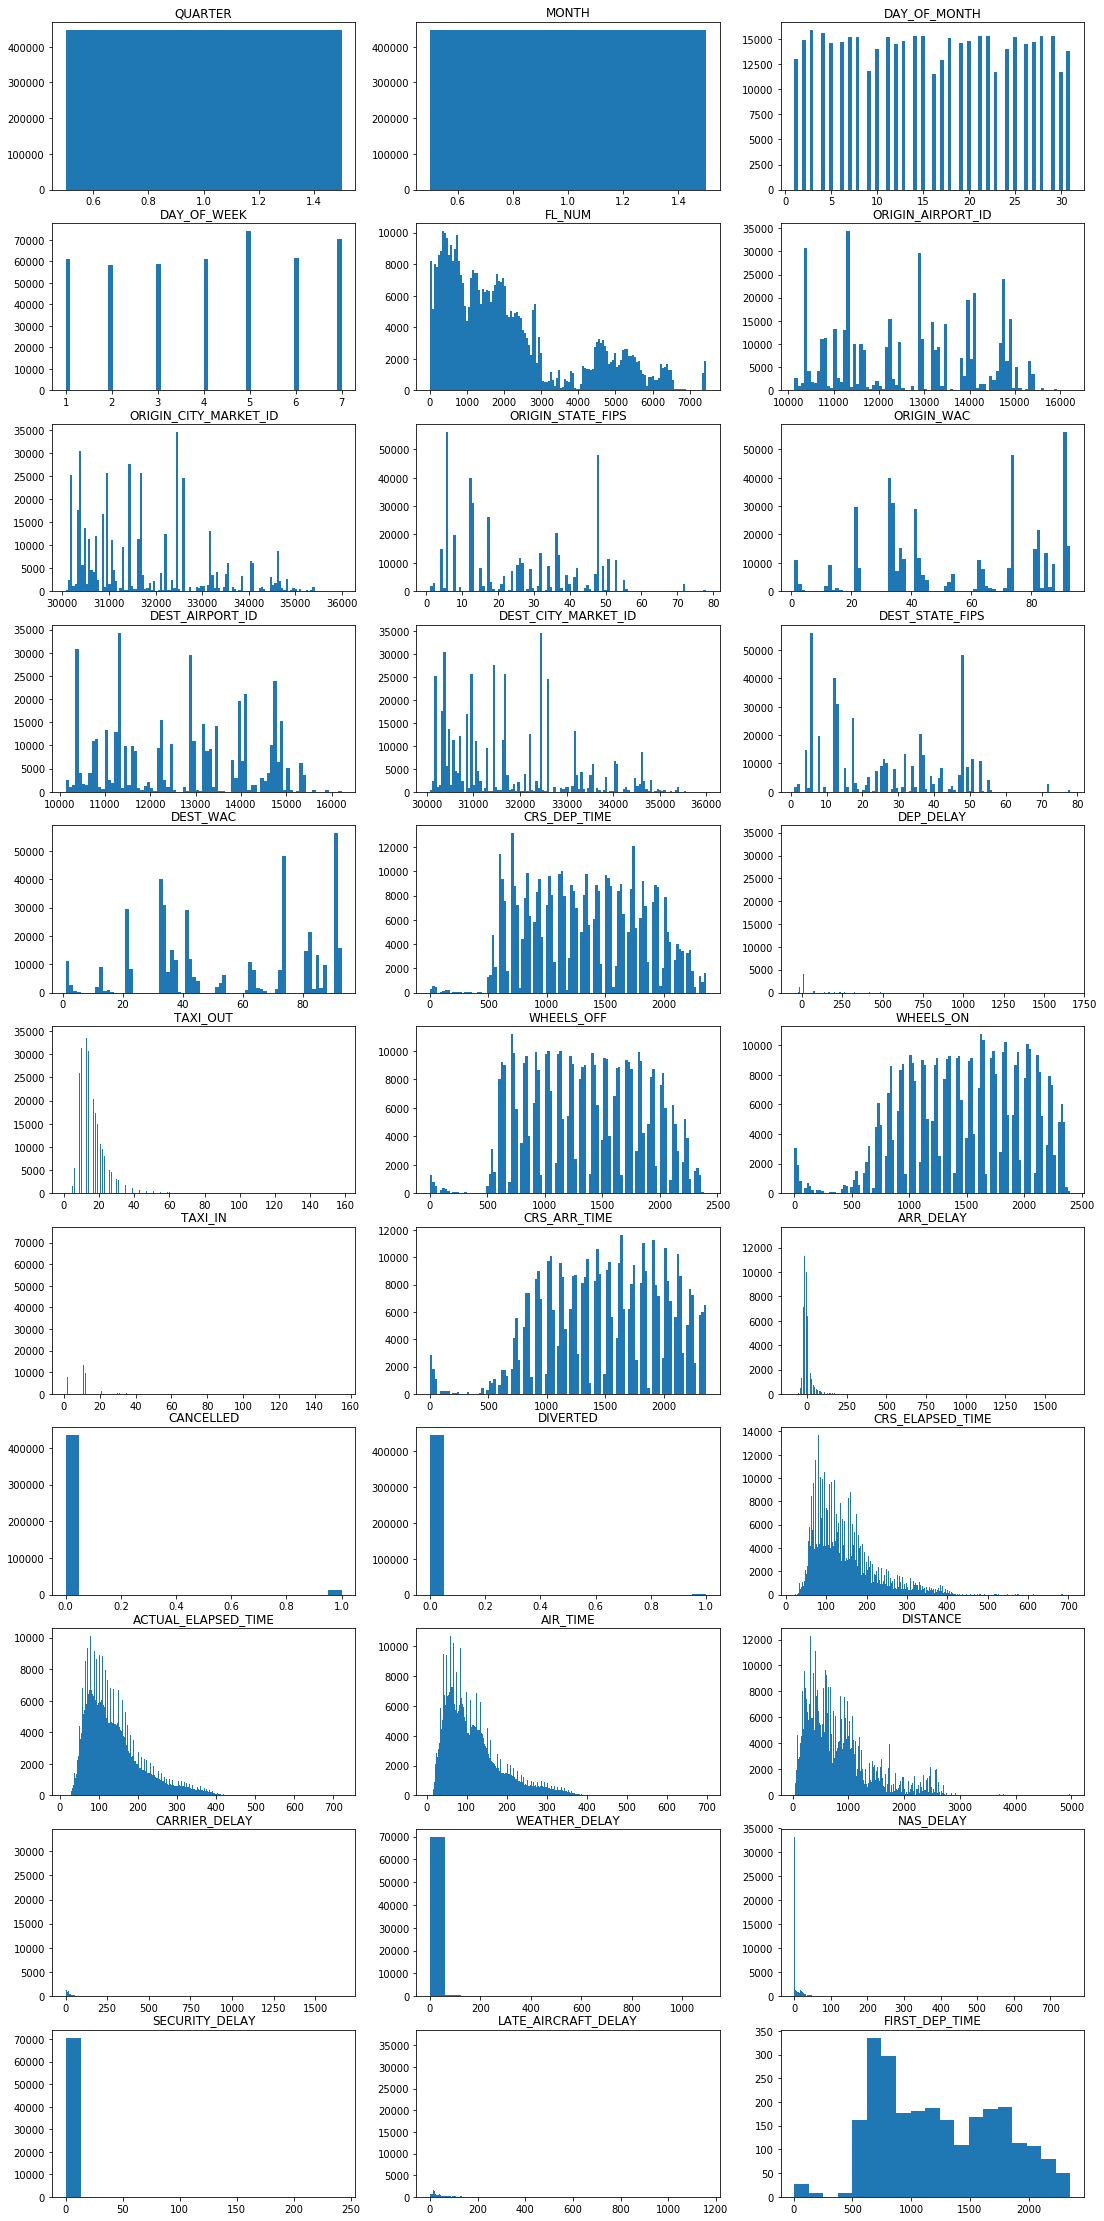

In [8]:
fig = plt.gcf()
fig.set_size_inches(18.5, 40, forward=True)

for i in range(1,len(col_to_plot)-1):
    plt.subplot(len(col_to_plot)//3, 3, i)
    plt.hist(df[~df[col_to_plot[i-1]].isna()][col_to_plot[i-1]],bins="auto")
    plt.title(col_to_plot[i-1])
    
plt.show()

En observant les histogrammes sur les données numériques, on ne remarque pas d'outlier particuliers.

In [9]:
col_to_plot = ["TAIL_NUM","DEP_TIME_BLK","ARR_TIME_BLK"]

fig = plt.gcf()
fig.set_size_inches(18.5, 18.5, forward=True)

for i in range(1,len(col_to_plot)+1):
    plt.subplot((len(col_to_plot)//2)+len(col_to_plot)%2, 2, i)
    plt.pie(df[col_to_plot[i-1]].value_counts())
    plt.legend(df[col_to_plot[i-1]].unique())
    plt.title(col_to_plot[i-1])
    
plt.show()

## Traitement des NAs

In [10]:
print("Pourcentage de NAs par colonnes")
(df.isna().sum(axis=0)[((df.isna().sum(axis=0)/len(df))*100)>0]/len(df))*100

Pourcentage de NAs par colonnes


TAIL_NUM                0.951939
DEP_TIME                2.573420
DEP_DELAY               2.573420
DEP_DELAY_NEW           2.573420
DEP_DEL15               2.573420
DEP_DELAY_GROUP         2.573420
TAXI_OUT                2.601906
WHEELS_OFF              2.601906
WHEELS_ON               2.670767
TAXI_IN                 2.670767
ARR_TIME                2.670767
ARR_DELAY               2.810283
ARR_DELAY_NEW           2.810283
ARR_DEL15               2.810283
ARR_DELAY_GROUP         2.810283
CANCELLATION_CODE      97.383514
ACTUAL_ELAPSED_TIME     2.810283
AIR_TIME                2.810283
CARRIER_DELAY          84.101008
WEATHER_DELAY          84.101008
NAS_DELAY              84.101008
SECURITY_DELAY         84.101008
LATE_AIRCRAFT_DELAY    84.101008
FIRST_DEP_TIME         99.427581
TOTAL_ADD_GTIME        99.427581
LONGEST_ADD_GTIME      99.427581
dtype: float64

Il y a 2.6164857669006136% de vols annulés.
AxesSubplot(0.260833,0.125;0.503333x0.755)


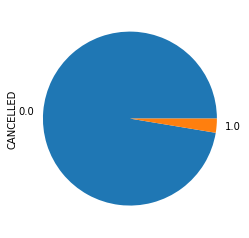

In [11]:
print("Il y a " + str((len(df[df["CANCELLED"]==1])/len(df["CANCELLED"]))*100) + "% de vols annulés.")
print(df["CANCELLED"].value_counts().plot(kind="pie"))

In [12]:
print("Pourcentage de NAs par colonnes pour les vols annulés")
(df[df["CANCELLED"]==1].isna().sum(axis=0)/len(df[df["CANCELLED"]==1]))[(df[df["CANCELLED"]==1].isna().sum(axis=0)/len(df[df["CANCELLED"]==1]))>0]

Pourcentage de NAs par colonnes pour les vols annulés


TAIL_NUM               0.363823
DEP_TIME               0.983541
DEP_DELAY              0.983541
DEP_DELAY_NEW          0.983541
DEP_DEL15              0.983541
DEP_DELAY_GROUP        0.983541
TAXI_OUT               0.994428
WHEELS_OFF             0.994428
WHEELS_ON              1.000000
TAXI_IN                1.000000
ARR_TIME               1.000000
ARR_DELAY              1.000000
ARR_DELAY_NEW          1.000000
ARR_DEL15              1.000000
ARR_DELAY_GROUP        1.000000
ACTUAL_ELAPSED_TIME    1.000000
AIR_TIME               1.000000
CARRIER_DELAY          1.000000
WEATHER_DELAY          1.000000
NAS_DELAY              1.000000
SECURITY_DELAY         1.000000
LATE_AIRCRAFT_DELAY    1.000000
FIRST_DEP_TIME         0.989113
TOTAL_ADD_GTIME        0.989113
LONGEST_ADD_GTIME      0.989113
dtype: float64

On supprime tous les vols annulés, puisque nous ne prédisons que les retards. C'est ma démarche dans un premier temps.

In [13]:
df = df[df["CANCELLED"]==0]

In [14]:
print("Pourcentage de NAs par colonnes sans les vols annulés")
(df.isna().sum(axis=0)[((df.isna().sum(axis=0)/len(df))*100)>0]/len(df))*100

Pourcentage de NAs par colonnes sans les vols annulés


WHEELS_ON                0.055740
TAXI_IN                  0.055740
ARR_TIME                 0.055740
ARR_DELAY                0.199004
ARR_DELAY_NEW            0.199004
ARR_DEL15                0.199004
ARR_DELAY_GROUP          0.199004
CANCELLATION_CODE      100.000000
ACTUAL_ELAPSED_TIME      0.199004
AIR_TIME                 0.199004
CARRIER_DELAY           83.673836
WEATHER_DELAY           83.673836
NAS_DELAY               83.673836
SECURITY_DELAY          83.673836
LATE_AIRCRAFT_DELAY     83.673836
FIRST_DEP_TIME          99.441453
TOTAL_ADD_GTIME         99.441453
LONGEST_ADD_GTIME       99.441453
dtype: float64

Au vu du nombre très faible de données manquantes concernant les mesures de temps d'arrivée, on supprime ces lignes.

In [15]:
df = df[~df["AIR_TIME"].isna()]

In [16]:
print("Pourcentage de NAs par colonnes après suppression des vols avec éléments d'arrivée manquants")
(df.isna().sum(axis=0)[((df.isna().sum(axis=0)/len(df))*100)>0]/len(df))*100

Pourcentage de NAs par colonnes après suppression des vols avec éléments d'arrivée manquants


CANCELLATION_CODE      100.000000
CARRIER_DELAY           83.641282
WEATHER_DELAY           83.641282
NAS_DELAY               83.641282
SECURITY_DELAY          83.641282
LATE_AIRCRAFT_DELAY     83.641282
FIRST_DEP_TIME          99.444032
TOTAL_ADD_GTIME         99.444032
LONGEST_ADD_GTIME       99.444032
dtype: float64

In [17]:
print("Nombre de vols restants après la suppression des vols contenant trop de données manquantes ou les vols annulés." + str(len(df)))

Nombre de vols restants après la suppression des vols contenant trop de données manquantes ou les vols annulés.433298


In [18]:
print("% de vols avec un retard à l'arrivée : " + str((len(df[df["ARR_DELAY"]>0])/len(df))*100))

% de vols avec un retard à l'arrivée : 32.836754381511106


In [19]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [20]:
df[df["CARRIER_DELAY"].isna()].loc[:,"CRS_DEP_TIME":"ARR_TIME_BLK"].describe()

CRS_DEP_TIME       DEP_TIME      DEP_DELAY  DEP_DELAY_NEW  \
count  362416.000000  362416.000000  362416.000000  362416.000000   
mean     1310.390921    1304.366637      -1.374600       2.100142   
std       484.064677     487.294758       7.476759       5.359038   
min         1.000000       1.000000     -47.000000       0.000000   
25%       905.000000     904.000000      -6.000000       0.000000   
50%      1305.000000    1304.000000      -3.000000       0.000000   
75%      1717.000000    1717.000000       0.000000       0.000000   
max      2359.000000    2400.000000      83.000000      83.000000   

           DEP_DEL15  DEP_DELAY_GROUP       TAXI_OUT     WHEELS_OFF  \
count  362416.000000    362416.000000  362416.000000  362416.000000   
mean        0.046976        -0.649698      15.336911    1325.905592   
std         0.211589         0.600154       6.839427     487.427267   
min         0.000000        -2.000000       1.000000       1.000000   
25%         0.000000        -1.000000      11.000000     919.000000   
50%         0.000000        -1.000000      14.000000    1317.000000   
75%         0.000000         0.000000      18.000000    1729.000000   
max         1.000000         5.000000      79.000000    2400.000000   

           WHEELS_ON        TAXI_IN   CRS_ARR_TIME       ARR_TIME  \
count  362416.000000  362416.000000  362416.000000  362416.000000   
mean     1466.763253       7.017615    1484.886559    1472.936424   
std       497.920020       4.375185     502.652534     500.967543   
min         1.000000       1.000000       1.000000       1.000000   
25%      1052.000000       4.000000    1105.000000    1057.000000   
50%      1458.000000       6.000000    1508.000000    1502.000000   
75%      1856.000000       8.000000    1909.000000    1902.000000   
max      2400.000000      72.000000    2359.000000    2400.000000   

           ARR_DELAY  ARR_DELAY_NEW  ARR_DEL15  ARR_DELAY_GROUP  
count  362416.000000  362416.000000   362416.0    362416.000000  
mean       -9.540418       1.246587        0.0        -1.068410  
std        11.518030       3.064377        0.0         0.711912  
min       -79.000000       0.000000        0.0        -2.000000  
25%       -17.000000       0.000000        0.0        -2.000000  
50%        -9.000000       0.000000        0.0        -1.000000  
75%        -2.000000       0.000000        0.0        -1.000000  
max        14.000000      14.000000        0.0         0.000000

Recherche du nombre de 

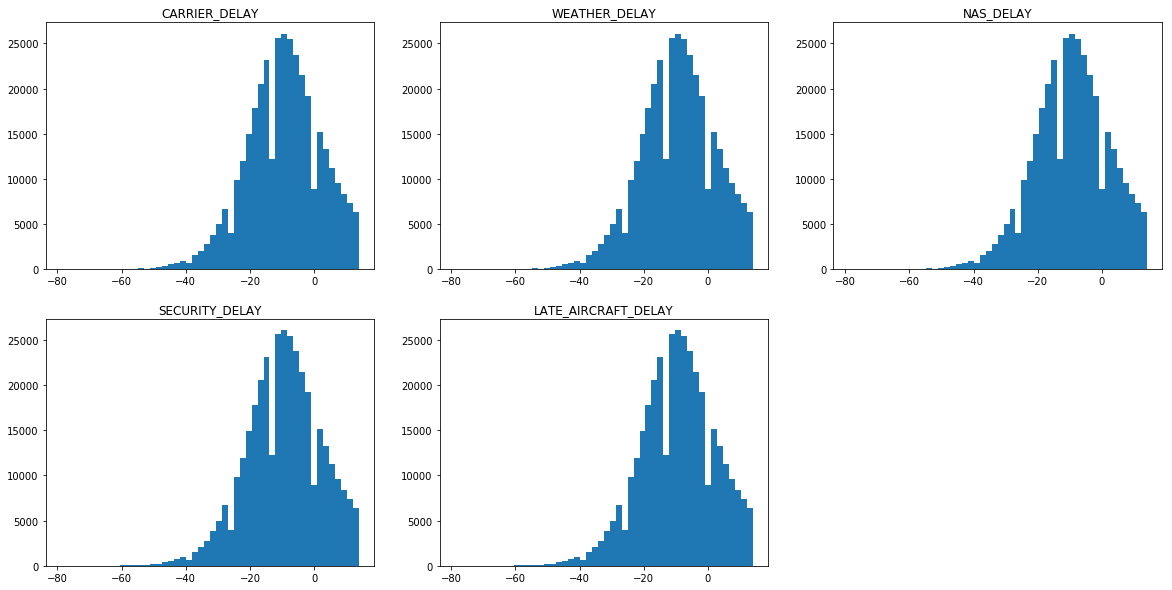

In [21]:
col_to_plot=['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

df[df["CARRIER_DELAY"].isna()]["ARR_DELAY"].plot(kind="hist")

fig = plt.gcf()
fig.set_size_inches(20, 10, forward=True)

for i in range(1,len(col_to_plot)+1):
    plt.subplot(len(col_to_plot)//3+1, 3, i)
    plt.hist(df[df[col_to_plot[i-1]].isna()]["ARR_DELAY"],bins=50)
    plt.title(col_to_plot[i-1])
    
plt.show()

In [22]:
df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']] = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].fillna(0.0)

In [23]:
print("Voici les colonnes étudiés dans ce DataFrame. Voyons si elles sont toutes utiles.")
print(df.columns)

Voici les colonnes étudiés dans ce DataFrame. Voyons si elles sont toutes utiles.
Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME

In [24]:
df.shape

(433298, 64)

In [25]:
print(df.columns)

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [26]:
df.describe(include="all")

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count   433298.0  433298.0  433298.0  433298.000000  433298.000000   
unique       NaN       NaN       NaN            NaN            NaN   
top          NaN       NaN       NaN            NaN            NaN   
freq         NaN       NaN       NaN            NaN            NaN   
mean      2016.0       1.0       1.0      15.762194       4.088341   
std          0.0       0.0       0.0       8.965021       2.000964   
min       2016.0       1.0       1.0       1.000000       1.000000   
25%       2016.0       1.0       1.0       8.000000       2.000000   
50%       2016.0       1.0       1.0      15.000000       4.000000   
75%       2016.0       1.0       1.0      24.000000       6.000000   
max       2016.0       1.0       1.0      31.000000       7.000000   

           FL_DATE UNIQUE_CARRIER     AIRLINE_ID CARRIER TAIL_NUM  \
count       433298         433298  433298.000000  433298   433298   
unique          31             12            NaN      12     4236   
top     2016-01-03             WN            NaN      WN   N489HA   
freq         15757         101335            NaN  101335      358   
mean           NaN            NaN   19902.293989     NaN      NaN   
std            NaN            NaN     382.617040     NaN      NaN   
min            NaN            NaN   19393.000000     NaN      NaN   
25%            NaN            NaN   19790.000000     NaN      NaN   
50%            NaN            NaN   19805.000000     NaN      NaN   
75%            NaN            NaN   20304.000000     NaN      NaN   
max            NaN            NaN   21171.000000     NaN      NaN   

               FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count   433298.000000      433298.000000           4.332980e+05   
unique            NaN                NaN                    NaN   
top               NaN                NaN                    NaN   
freq              NaN                NaN                    NaN   
mean      2077.255651       12687.277326           1.268731e+06   
std       1756.814796        1531.194280           1.531191e+05   
min          1.000000       10135.000000           1.013503e+06   
25%        701.000000       11292.000000           1.129202e+06   
50%       1591.000000       12889.000000           1.288903e+06   
75%       2762.000000       14057.000000           1.405702e+06   
max       7438.000000       16218.000000           1.621801e+06   

        ORIGIN_CITY_MARKET_ID  ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
count           433298.000000  433298           433298           433298   
unique                    NaN     294              290               52   
top                       NaN     ATL      Atlanta, GA               CA   
freq                      NaN   29413            29413            54922   
mean             31722.659435     NaN              NaN              NaN   
std               1282.119028     NaN              NaN              NaN   
min              30070.000000     NaN              NaN              NaN   
25%              30599.000000     NaN              NaN              NaN   
50%              31453.000000     NaN              NaN              NaN   
75%              32467.000000     NaN              NaN              NaN   
max              35991.000000     NaN              NaN              NaN   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM     ORIGIN_WAC  DEST_AIRPORT_ID  \
count       433298.000000          433298  433298.000000    433298.000000   
unique                NaN              52            NaN              NaN   
top                   NaN      California            NaN              NaN   
freq                  NaN           54922            NaN              NaN   
mean            25.641258             NaN      55.922972     12686.866002   
std             16.771636             NaN      26.945769      1531.227798   
min              1.000000             NaN       1.000000     10135.000000   
25%             12.0

In [27]:
df.loc[:,"WHEELS_ON":"ARR_TIME_BLK"].head(10)

WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  ARR_DELAY_NEW  \
0     1424.0      8.0          1438    1432.0       -6.0            0.0   
1     1416.0     10.0          1438    1426.0      -12.0            0.0   
2     1431.0     14.0          1438    1445.0        7.0            7.0   
3     1424.0      9.0          1438    1433.0       -5.0            0.0   
4     1617.0     14.0          1438    1631.0      113.0          113.0   
5     1426.0      9.0          1438    1435.0       -3.0            0.0   
6     1429.0      9.0          1438    1438.0        0.0            0.0   
7     1419.0     12.0          1438    1431.0       -7.0            0.0   
8     1420.0      8.0          1438    1428.0      -10.0            0.0   
9     1423.0     11.0          1438    1434.0       -4.0            0.0   

   ARR_DEL15  ARR_DELAY_GROUP ARR_TIME_BLK  
0        0.0             -1.0    1400-1459  
1        0.0             -1.0    1400-1459  
2        0.0              0.0    1400-1459  
3        0.0             -1.0    1400-1459  
4        1.0              7.0    1400-1459  
5        0.0             -1.0    1400-1459  
6        0.0              0.0    1400-1459  
7        0.0             -1.0    1400-1459  
8        0.0             -1.0    1400-1459  
9        0.0             -1.0    1400-1459

In [28]:
columns_to_drop = ["DEP_TIME","DEP_DELAY_NEW","DEP_DEL15","DEP_DELAY_GROUP","ARR_TIME","ARR_DELAY_NEW","ARR_DEL15","ARR_DELAY_GROUP"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.shape

(433298, 56)

In [29]:
print(df.columns)

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME'],
      

In [30]:
df.describe(include="all")

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count   433298.0  433298.0  433298.0  433298.000000  433298.000000   
unique       NaN       NaN       NaN            NaN            NaN   
top          NaN       NaN       NaN            NaN            NaN   
freq         NaN       NaN       NaN            NaN            NaN   
mean      2016.0       1.0       1.0      15.762194       4.088341   
std          0.0       0.0       0.0       8.965021       2.000964   
min       2016.0       1.0       1.0       1.000000       1.000000   
25%       2016.0       1.0       1.0       8.000000       2.000000   
50%       2016.0       1.0       1.0      15.000000       4.000000   
75%       2016.0       1.0       1.0      24.000000       6.000000   
max       2016.0       1.0       1.0      31.000000       7.000000   

           FL_DATE UNIQUE_CARRIER     AIRLINE_ID CARRIER TAIL_NUM  \
count       433298         433298  433298.000000  433298   433298   
unique          31             12            NaN      12     4236   
top     2016-01-03             WN            NaN      WN   N489HA   
freq         15757         101335            NaN  101335      358   
mean           NaN            NaN   19902.293989     NaN      NaN   
std            NaN            NaN     382.617040     NaN      NaN   
min            NaN            NaN   19393.000000     NaN      NaN   
25%            NaN            NaN   19790.000000     NaN      NaN   
50%            NaN            NaN   19805.000000     NaN      NaN   
75%            NaN            NaN   20304.000000     NaN      NaN   
max            NaN            NaN   21171.000000     NaN      NaN   

               FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count   433298.000000      433298.000000           4.332980e+05   
unique            NaN                NaN                    NaN   
top               NaN                NaN                    NaN   
freq              NaN                NaN                    NaN   
mean      2077.255651       12687.277326           1.268731e+06   
std       1756.814796        1531.194280           1.531191e+05   
min          1.000000       10135.000000           1.013503e+06   
25%        701.000000       11292.000000           1.129202e+06   
50%       1591.000000       12889.000000           1.288903e+06   
75%       2762.000000       14057.000000           1.405702e+06   
max       7438.000000       16218.000000           1.621801e+06   

        ORIGIN_CITY_MARKET_ID  ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
count           433298.000000  433298           433298           433298   
unique                    NaN     294              290               52   
top                       NaN     ATL      Atlanta, GA               CA   
freq                      NaN   29413            29413            54922   
mean             31722.659435     NaN              NaN              NaN   
std               1282.119028     NaN              NaN              NaN   
min              30070.000000     NaN              NaN              NaN   
25%              30599.000000     NaN              NaN              NaN   
50%              31453.000000     NaN              NaN              NaN   
75%              32467.000000     NaN              NaN              NaN   
max              35991.000000     NaN              NaN              NaN   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM     ORIGIN_WAC  DEST_AIRPORT_ID  \
count       433298.000000          433298  433298.000000    433298.000000   
unique                NaN              52            NaN              NaN   
top                   NaN      California            NaN              NaN   
freq                  NaN           54922            NaN              NaN   
mean            25.641258             NaN      55.922972     12686.866002   
std             16.771636             NaN      26.945769      1531.227798   
min              1.000000             NaN       1.000000     10135.000000   
25%             12.0

AxesSubplot(0.125,0.125;0.775x0.755)


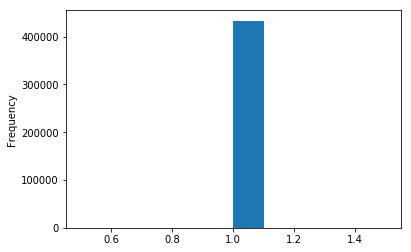

In [31]:
print(df["FLIGHTS"].plot(kind="hist"))

In [32]:
columns_to_drop = ["FLIGHTS","DISTANCE_GROUP"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.shape

(433298, 54)

In [33]:
df.loc[50:75,"FIRST_DEP_TIME":]

FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME
50             NaN              NaN                NaN
51             NaN              NaN                NaN
52             NaN              NaN                NaN
53             NaN              NaN                NaN
54             NaN              NaN                NaN
55             NaN              NaN                NaN
56             NaN              NaN                NaN
57             NaN              NaN                NaN
58             NaN              NaN                NaN
59             NaN              NaN                NaN
60             NaN              NaN                NaN
61             NaN              NaN                NaN
62             NaN              NaN                NaN
63             NaN              NaN                NaN
64             NaN              NaN                NaN
65             NaN              NaN                NaN
66             NaN              NaN                NaN
67             NaN              NaN                NaN
68             NaN              NaN                NaN
69             NaN              NaN                NaN
70           642.0             11.0               11.0
71             NaN              NaN                NaN
73             NaN              NaN                NaN
74             NaN              NaN                NaN
75             NaN              NaN                NaN

In [34]:
print(df.columns)
df.shape

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME'],
      dtype='object')


(433298, 54)

In [35]:
df["ARR_DELAY"].describe()

count    433298.000000
mean          1.533654
std          39.096842
min         -79.000000
25%         -15.000000
50%          -7.000000
75%           5.000000
max        1659.000000
Name: ARR_DELAY, dtype: float64

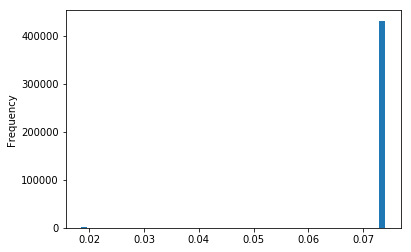

In [36]:
(df.isna().sum(axis=1)/len(df.columns)).plot(kind="hist",bins=50)

In [37]:
df[(df.isna().sum(axis=1)/len(df.columns))>0.25]

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, UNIQUE_CARRIER, AIRLINE_ID, CARRIER, TAIL_NUM, FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_FIPS, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_DELAY, DEP_TIME_BLK, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_DELAY, ARR_TIME_BLK, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, FIRST_DEP_TIME, TOTAL_ADD_GTIME, LONGEST_ADD_GTIME]
Index: []

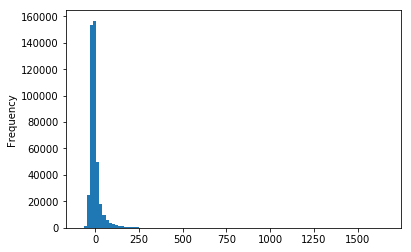

In [38]:
df["ARR_DELAY"].plot(kind="hist",bins=100)

In [39]:
df.loc[50:75,"WHEELS_ON":"LATE_AIRCRAFT_DELAY"]

WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_DELAY ARR_TIME_BLK  CANCELLED  \
50     1704.0      4.0          1730      -22.0    1700-1759        0.0   
51     1715.0      5.0          1730      -10.0    1700-1759        0.0   
52     1637.0      6.0          1730      -47.0    1700-1759        0.0   
53     1725.0      6.0          1730        1.0    1700-1759        0.0   
54     1702.0      6.0          1730      -22.0    1700-1759        0.0   
55     1808.0      5.0          1730       43.0    1700-1759        0.0   
56     1721.0     15.0          1730        6.0    1700-1759        0.0   
57     1603.0      7.0          1602        8.0    1600-1659        0.0   
58     1556.0     17.0          1602       11.0    1600-1659        0.0   
59     1539.0      8.0          1602      -15.0    1600-1659        0.0   
60     1546.0      5.0          1602      -11.0    1600-1659        0.0   
61     1519.0      5.0          1527       -3.0    1500-1559        0.0   
62     1514.0      4.0          1527       -9.0    1500-1559        0.0   
63     1517.0      5.0          1527       -5.0    1500-1559        0.0   
64     1518.0      9.0          1527        0.0    1500-1559        0.0   
65     1521.0     15.0          1527        9.0    1500-1559        0.0   
66     1601.0     10.0          1527       44.0    1500-1559        0.0   
67     1514.0      5.0          1527       -8.0    1500-1559        0.0   
68     1445.0      7.0          1506      -14.0    1500-1559        0.0   
69     1436.0      5.0          1506      -25.0    1500-1559        0.0   
70     1530.0      7.0          1506       31.0    1500-1559        0.0   
71     1444.0      7.0          1506      -15.0    1500-1559        0.0   
73     1525.0      7.0          1506       26.0    1500-1559        0.0   
74     1433.0      6.0          1506      -27.0    1500-1559        0.0   
75     1441.0      6.0          1506      -19.0    1500-1559        0.0   

   CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
50               NaN       0.0             187.0                170.0   
51               NaN       0.0             187.0                181.0   
52               NaN       0.0             187.0                145.0   
53               NaN       0.0             187.0                176.0   
54               NaN       0.0             187.0                167.0   
55               NaN       0.0             187.0                164.0   
56               NaN       0.0             187.0                193.0   
57               NaN       0.0             317.0                329.0   
58               NaN       0.0             317.0                336.0   
59               NaN       0.0             317.0                304.0   
60               NaN       0.0             317.0                314.0   
61               NaN       0.0             317.0                316.0   
62               NaN       0.0             317.0                315.0   
63               NaN       0.0             317.0                318.0   
64               NaN       0.0             317.0                326.0   
65               NaN       0.0             317.0                333.0   
66               NaN       0.0             317.0                360.0   
67               NaN       0.0             317.0                310.0   
68               NaN       0.0             321.0                316.0   
69               NaN       0.0             321.0                302.0   
70               NaN       0.0             321.0                300.0   
71               NaN       0.0             321.0                312.0   
73               NaN       0.0             321.0                304.0   
74               NaN       0.0             321.0                298.0   
75               NaN       0.0             321.0                309.0   

    AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
50     155.0     986.0            0.0            0.0        0.0   
51     165.0     986

# Analyse exploratoire

In [40]:
df[["ORIGIN_AIRPORT_ID","DEP_DELAY","ARR_DELAY"]].groupby(['ORIGIN_AIRPORT_ID']).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10)

DEP_DELAY  ARR_DELAY
ORIGIN_AIRPORT_ID                      
15991             -19.482759 -20.068966
15497              -8.666667 -20.000000
10926             -15.898305 -14.796610
10581              -4.833333 -14.000000
14256             -14.450000 -12.433333
14709             -12.253165 -11.544304
12891              -3.436782 -10.195402
11865              -4.727273  -9.488636
11630              -6.523256  -9.145349
12265              -2.464286  -9.071429

In [41]:
df[["CARRIER","DEP_DELAY","ARR_DELAY"]].groupby(['CARRIER']).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"])

DEP_DELAY  ARR_DELAY
CARRIER                      
AS        0.885916  -3.922803
UA        9.315958  -2.889025
F9        6.469222  -1.860217
HA       -1.724561  -1.629027
DL        7.483285  -0.838730
WN        6.667311  -0.446628
EV        6.065838   1.628090
AA        7.084635   1.934269
OO        9.944295   7.446567
VX       13.414527   7.615753
B6       14.434727  10.127736
NK       14.523068  13.127785

In [42]:
corr = df[["DEP_DELAY","ARR_DELAY","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]].corr()
corr.style.background_gradient(cmap='coolwarm')

In [43]:
df["AtA_PATH"] = df["ORIGIN_AIRPORT_ID"].astype(str) + df["DEST_AIRPORT_ID"].astype(str)
print(df[["ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","AtA_PATH"]])

        ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID    AtA_PATH
0                   11298            11433  1129811433
1                   11298            11433  1129811433
2                   11298            11433  1129811433
3                   11298            11433  1129811433
4                   11298            11433  1129811433
5                   11298            11433  1129811433
6                   11298            11433  1129811433
7                   11298            11433  1129811433
8                   11298            11433  1129811433
9                   11298            11433  1129811433
10                  11298            11433  1129811433
11                  11298            11433  1129811433
12                  11298            11433  1129811433
13                  11298            11433  1129811433
14                  11298            11433  1129811433
15                  11298            11433  1129811433
16                  11298            11433  1129811433
17        

In [44]:
df["CtC_PATH"] = df["ORIGIN_CITY_MARKET_ID"].astype(str) + df["DEST_CITY_MARKET_ID"].astype(str)
print(df[["ORIGIN_CITY_MARKET_ID","DEST_CITY_MARKET_ID","CtC_PATH"]])

        ORIGIN_CITY_MARKET_ID  DEST_CITY_MARKET_ID    CtC_PATH
0                       30194                31295  3019431295
1                       30194                31295  3019431295
2                       30194                31295  3019431295
3                       30194                31295  3019431295
4                       30194                31295  3019431295
5                       30194                31295  3019431295
6                       30194                31295  3019431295
7                       30194                31295  3019431295
8                       30194                31295  3019431295
9                       30194                31295  3019431295
10                      30194                31295  3019431295
11                      30194                31295  3019431295
12                      30194                31295  3019431295
13                      30194                31295  3019431295
14                      30194                31295  301

In [45]:
df["StS_PATH"] = df["ORIGIN_STATE_FIPS"].astype(str) + df["DEST_STATE_FIPS"].astype(str)
print(df[["ORIGIN_STATE_FIPS","DEST_STATE_FIPS","StS_PATH"]])

        ORIGIN_STATE_FIPS  DEST_STATE_FIPS StS_PATH
0                      48               26     4826
1                      48               26     4826
2                      48               26     4826
3                      48               26     4826
4                      48               26     4826
5                      48               26     4826
6                      48               26     4826
7                      48               26     4826
8                      48               26     4826
9                      48               26     4826
10                     48               26     4826
11                     48               26     4826
12                     48               26     4826
13                     48               26     4826
14                     48               26     4826
15                     48               26     4826
16                     48               26     4826
17                     48               26     4826
18          

In [46]:
df[["AtA_PATH","ORIGIN","DEST","DEP_DELAY","ARR_DELAY"]].groupby(['AtA_PATH',"ORIGIN","DEST"]).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10)

DEP_DELAY  ARR_DELAY
AtA_PATH   ORIGIN DEST                      
1288910299 LAS    ANC   -6.285714 -46.357143
1275811292 KOA    DEN   -1.875000 -45.125000
1295313502 LGA    MTJ   -8.500000 -39.000000
1295313244 LGA    MEM   -8.000000 -39.000000
1217314869 HNL    SLC   -5.000000 -38.966667
1217312264 HNL    IAD   -1.250000 -38.125000
1275814679 KOA    SAN    0.571429 -35.642857
1217311292 HNL    DEN    4.266667 -35.566667
1217313487 HNL    MSP   -1.392857 -32.607143
1127814747 DCA    SEA   -1.982143 -31.571429

In [47]:
df[["CtC_PATH","ORIGIN_CITY_NAME","DEST_CITY_NAME","DEP_DELAY","ARR_DELAY"]].groupby(['CtC_PATH',"ORIGIN_CITY_NAME","DEST_CITY_NAME"]).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10)

DEP_DELAY  ARR_DELAY
CtC_PATH   ORIGIN_CITY_NAME   DEST_CITY_NAME                          
3221130299 Las Vegas, NV      Anchorage, AK       -6.285714 -46.357143
3275830325 Kona, HI           Denver, CO          -1.875000 -45.125000
3170333502 New York, NY       Montrose/Delta, CO  -8.500000 -39.000000
3170333244 New York, NY       Memphis, TN         -8.000000 -39.000000
3213434614 Honolulu, HI       Salt Lake City, UT  -5.000000 -38.966667
3213430852 Honolulu, HI       Washington, DC      -1.250000 -38.125000
3275833570 Kona, HI           San Diego, CA        0.571429 -35.642857
3213430325 Honolulu, HI       Denver, CO           4.266667 -35.566667
3213431650 Honolulu, HI       Minneapolis, MN     -1.392857 -32.607143
3153730397 Elmira/Corning, NY Atlanta, GA         -3.333333 -29.666667

In [48]:
df[["StS_PATH","ORIGIN_STATE_NM","DEST_STATE_NM","DEP_DELAY","ARR_DELAY"]].groupby(['StS_PATH',"ORIGIN_STATE_NM","DEST_STATE_NM"]).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10)

DEP_DELAY  ARR_DELAY
StS_PATH ORIGIN_STATE_NM DEST_STATE_NM                      
322      Nevada          Alaska         -6.285714 -46.357143
1549     Hawaii          Utah           -5.000000 -38.966667
1551     Hawaii          Virginia       -1.250000 -38.125000
1527     Hawaii          Minnesota      -1.392857 -32.607143
158      Hawaii          Colorado        7.045455 -29.333333
2541     Massachusetts   Oregon          0.516129 -29.258065
3813     North Dakota    Georgia        -3.000000 -29.000000
1231     Florida         Nebraska       -4.500000 -28.250000
5153     Virginia        Washington      1.100719 -25.733813
4553     South Carolina  Washington     -4.529412 -25.647059

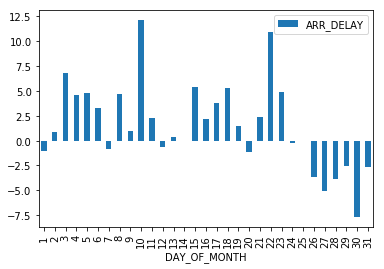

In [49]:
df[["DAY_OF_MONTH","ARR_DELAY"]].groupby(by="DAY_OF_MONTH").mean().plot(kind="bar")

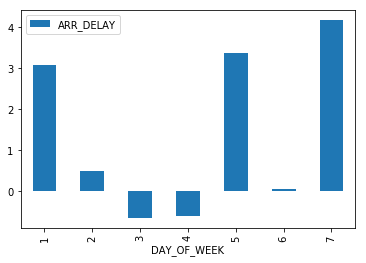

In [50]:
df[["DAY_OF_WEEK","ARR_DELAY"]].groupby(by="DAY_OF_WEEK").mean().plot(kind="bar")

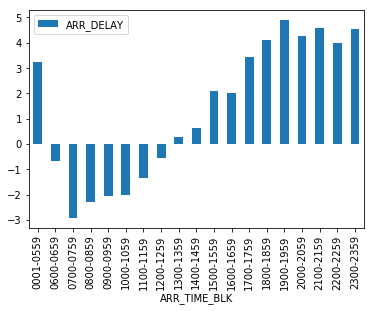

In [51]:
df[["ARR_TIME_BLK","ARR_DELAY"]].groupby(by="ARR_TIME_BLK").mean().plot(kind="bar")

In [52]:
df["CRS_DEP_TIME_10"] = df["CRS_DEP_TIME"]/10
df["CRS_ARR_TIME_10"] = df["CRS_ARR_TIME"]/10

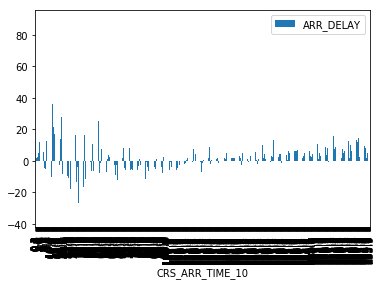

In [53]:
df[["CRS_ARR_TIME_10","ARR_DELAY"]].groupby(by="CRS_ARR_TIME_10").mean().plot(kind="bar")

In [54]:
print(df[["TAIL_NUM","DEP_DELAY","ARR_DELAY"]].groupby(["TAIL_NUM"]).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10))
top_used_tail_list = df[["TAIL_NUM","DEP_DELAY","ARR_DELAY"]].groupby(["TAIL_NUM"]).mean().sort_values(by=["ARR_DELAY","DEP_DELAY"]).head(10).index.tolist()
df[df["TAIL_NUM"].isin(top_used_tail_list)].groupby("TAIL_NUM")["TAIL_NUM"].count()
df["TAIL_NUM"].describe()

          DEP_DELAY  ARR_DELAY
TAIL_NUM                      
N823NW    -2.500000 -32.500000
N182DN     1.500000 -22.500000
N653UA     0.500000 -20.500000
N178DZ     0.200000 -20.200000
N814NW     0.750000 -19.250000
N824NW     0.833333 -18.833333
N798UA     6.333333 -18.666667
N807NW    10.363636 -18.636364
N187DN    -1.407407 -18.555556
N855NW     4.000000 -17.000000


count     433298
unique      4236
top       N489HA
freq         358
Name: TAIL_NUM, dtype: object

# PREMIÈRE RÉGRESSION

Suppression des données inutiles

In [55]:
columns_to_drop = ["YEAR","FL_DATE","AIRLINE_ID","CARRIER","ORIGIN_AIRPORT_SEQ_ID","ORIGIN","ORIGIN_CITY_NAME","ORIGIN_STATE_ABR","ORIGIN_STATE_NM","DEST_AIRPORT_SEQ_ID","DEST","DEST_CITY_NAME","DEST_STATE_ABR","DEST_STATE_NM"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.shape

(433298, 45)

In [59]:
df.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER',
       'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_DELAY', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_TIME_BLK', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'AtA_PATH',
       'CtC_PATH', 'StS_PATH', 'CRS_DEP_TIME_10', 'CRS_ARR_TIME_10'],
      dtype='object')

In [ ]:
columns_to_drop = ["QUARTER","MONTH","AIRLINE_ID","DEP_TIME_BLK",]
df.drop(columns_to_drop, axis=1, inplace=True)
df.shape

In [62]:
df.WHEELS_ON.head(10)

0    1424.0
1    1416.0
2    1431.0
3    1424.0
4    1617.0
5    1426.0
6    1429.0
7    1419.0
8    1420.0
9    1423.0
Name: WHEELS_ON, dtype: float64